# Factor Model of Asset Return


In [1]:
import numpy as np
import pandas as pd
import time
import os
# import quiz_helper
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

### data bundle

In [ ]:
import os
import quiz_helper
from zipline.data import bundles

In [3]:

import zipline.data.bundles as bundles
import pandas as pd
from zipline.data.bundles import register, yahoo_NYSE, csvdir

# Specify the bundle name
bundle_name = 'yahoo_NYSE'

start_session = pd.Timestamp('2013-07-01')  # Timezone-naive
end_session = pd.Timestamp('2017-06-30')    # Timezone-naive


register(
    'yahoo_NYSE',
    yahoo_NYSE.yahoo_NYSE(
        tframes=["daily"],
        csvdir="/home/ankit/AI_for_trading/Data/data/eod-quotemedia/"
    )
)

bundle_data = bundles.load('yahoo_NYSE')

/tmp/ipykernel_7043/1568509080.py:12: UserWarning: Overwriting bundle with name 'yahoo_NYSE'
  register(


### Build pipeline engine

In [14]:
from zipline.pipeline import Pipeline, engine
from zipline.pipeline.factors import AverageDollarVolume
from zipline.pipeline.loaders import USEquityPricingLoader
from zipline.utils.calendar_utils import get_calendar

def choose_price_loader(column):
    if column not in USEquityPricing.columns:
        print("Column not in USEquityPricing.columns")
    return pricing_loader

universe = AverageDollarVolume(window_length=120).top(500) 
trading_calendar = get_calendar('NYSE') 

pricing_loader = USEquityPricingLoader(bundle_data.equity_daily_bar_reader, bundle_data.adjustment_reader,fx_reader=None)



engine = engine.SimplePipelineEngine(choose_price_loader,bundle_data.asset_finder)

### View Data¶
With the pipeline engine built, let's get the stocks at the end of the period in the universe we're using. We'll use these tickers to generate the returns data for the our risk model.

In [15]:
from zipline.pipeline.domain import US_EQUITIES

universe_end_date = pd.Timestamp('2017-01-06')

universe_tickers = engine\
    .run_pipeline(
        Pipeline(screen=universe,domain=US_EQUITIES),
        universe_end_date,
        universe_end_date)\
    .index.get_level_values(1)\
    .values.tolist()
    
universe_tickers

[Equity(0 [A]),
 Equity(1 [AAL]),
 Equity(2 [AAP]),
 Equity(3 [AAPL]),
 Equity(4 [ABBV]),
 Equity(5 [ABT]),
 Equity(6 [ACN]),
 Equity(7 [ADBE]),
 Equity(8 [ADI]),
 Equity(9 [ADM]),
 Equity(10 [ADP]),
 Equity(11 [ADSK]),
 Equity(12 [AEE]),
 Equity(13 [AEP]),
 Equity(14 [AES]),
 Equity(15 [AET]),
 Equity(16 [AFL]),
 Equity(17 [AIG]),
 Equity(18 [AIV]),
 Equity(19 [AIZ]),
 Equity(20 [AJG]),
 Equity(21 [AKAM]),
 Equity(22 [ALB]),
 Equity(23 [ALGN]),
 Equity(24 [ALK]),
 Equity(25 [ALL]),
 Equity(26 [AMAT]),
 Equity(27 [AMD]),
 Equity(28 [AME]),
 Equity(29 [AMG]),
 Equity(30 [AMGN]),
 Equity(31 [AMP]),
 Equity(32 [AMT]),
 Equity(33 [AMZN]),
 Equity(34 [ANDV]),
 Equity(35 [ANSS]),
 Equity(36 [AON]),
 Equity(37 [AOS]),
 Equity(38 [APA]),
 Equity(39 [APD]),
 Equity(40 [APH]),
 Equity(41 [ARE]),
 Equity(42 [AVB]),
 Equity(43 [AVGO]),
 Equity(44 [AVY]),
 Equity(45 [AWK]),
 Equity(46 [AXP]),
 Equity(47 [AYI]),
 Equity(48 [AZO]),
 Equity(49 [BA]),
 Equity(50 [BAC]),
 Equity(51 [BAX]),
 Equity(52 [B

In [16]:
len(universe_tickers)

408

In [17]:
from zipline.data.data_portal import DataPortal

data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader)

## Get pricing data helper function

In [ ]:
from quiz_helper import get_pricing

## get pricing data into a dataframe

In [78]:

def get_pricing(data_portal, trading_calendar, assets, start_date, end_date, field='close'):
    end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'))
    start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'))

    end_loc = trading_calendar.closes.index.get_loc(end_dt)
    start_loc = trading_calendar.closes.index.get_loc(start_dt)

    return data_portal.get_history_window(
        assets=assets,
        end_dt=end_dt,
        bar_count=end_loc - start_loc,
        frequency='1d',
        field=field,
        data_frequency='daily')

returns_df = \
    get_pricing(
        data_portal,
        trading_calendar,
        universe_tickers,
        universe_end_date - pd.DateOffset(years=2),
        universe_end_date)\
    .pct_change()[1:].fillna(0) #convert prices into returns

returns_df

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABT]),Equity(6 [ACN]),Equity(7 [ADBE]),Equity(8 [ADI]),Equity(9 [ADM]),...,Equity(398 [WYNN]),Equity(399 [XEL]),Equity(400 [XOM]),Equity(401 [XRAY]),Equity(402 [XRX]),Equity(403 [XYL]),Equity(404 [YUM]),Equity(405 [ZBH]),Equity(406 [ZION]),Equity(407 [ZTS])
2015-01-08,0.029975,0.012262,0.008765,0.038384,0.010459,0.020554,0.015249,0.025454,0.017655,-0.014609,...,0.012031,0.011599,0.016645,0.024689,0.027531,0.007546,0.017404,0.010623,0.013994,0.015399
2015-01-09,-0.007337,-0.030563,-0.005089,0.001108,-0.027355,-0.010508,-0.001113,-0.014811,-0.000730,-0.008530,...,0.012499,-0.012285,-0.001410,-0.014569,-0.005798,-0.018863,-0.001758,-0.014427,-0.027975,0.001584
2015-01-12,-0.011826,-0.046905,-0.008546,-0.024676,-0.000304,0.008407,-0.003007,-0.010022,-0.010051,-0.012495,...,-0.003958,-0.008845,-0.019218,-0.009477,-0.010199,-0.021770,-0.007480,0.002370,-0.015349,-0.018757
2015-01-13,-0.013962,0.016539,-0.032530,0.008897,-0.036040,-0.021281,0.003575,-0.007452,-0.011445,0.001452,...,0.009093,0.008087,-0.003653,-0.003062,0.005166,0.002312,-0.004121,0.002191,-0.017147,-0.014049
2015-01-14,-0.012389,-0.019643,-0.019056,-0.003811,0.004890,-0.007397,-0.011689,-0.008500,-0.000747,-0.017191,...,-0.008077,0.008852,-0.002889,-0.014587,0.004389,-0.006344,-0.004138,-0.013219,-0.017050,0.005139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30,-0.001753,-0.011852,-0.006812,-0.007813,-0.001754,0.002610,0.001026,-0.007041,-0.013047,0.006393,...,-0.007571,-0.005862,-0.000996,-0.008927,0.001132,-0.005023,-0.004715,-0.002896,0.005842,-0.001678
2017-01-03,0.020413,-0.008353,0.008751,0.002867,-0.003354,0.016662,-0.005720,0.005148,-0.001515,0.011829,...,0.010981,-0.001966,0.006980,0.015417,0.198053,0.002625,-0.001895,0.001258,0.003253,0.001121
2017-01-04,0.013121,0.008639,0.008206,-0.001136,0.014100,0.007939,0.002404,0.006378,-0.002069,-0.001732,...,0.032243,0.004431,-0.011002,0.008188,0.037736,0.014904,0.003639,0.009201,0.014358,0.009703
2017-01-05,-0.011890,-0.017345,-0.000698,0.005103,0.007584,0.008638,-0.014991,0.016996,-0.014373,-0.007374,...,0.012849,0.000000,-0.014907,-0.013029,-0.004196,-0.009129,0.003310,0.006420,-0.016210,-0.003327


## Let's look at one stock

 Let's look at this for just one stock.  We'll pick AAPL in this example.

In [79]:
aapl_col = returns_df.columns[3]
asset_return = returns_df[aapl_col]

asset_return = asset_return.rename('asset_return')

## Factor returns
Let's make up a "factor" by taking an average of all stocks in our list.  You can think of this as an equal weighted index of the 490 stocks, kind of like a measure of the "market".  We'll also make another factor by calculating the median of all the stocks.  These are mainly intended to help us generate some data to work with.  We'll go into how some common risk factors are generated later in the lessons.

Also note that we're setting axis=1 so that we calculate a value for each time period (row) instead of one value for each column (assets).

In [80]:
factor_return_1 = returns_df.mean(axis=1)

In [81]:
factor_return_2 = returns_df.median(axis=1)

## Factor exposures

Factor exposures refer to how "exposed" a stock is to each factor.  We'll get into this more later.  For now, just think of this as one number for each stock, for each of the factors.

In [23]:
from sklearn.linear_model import LinearRegression

In [82]:
"""
You can run these in separate cells to see each step in detail
But for now, just assume that we're calculating a number for each 
stock, for each factor, which represents how "exposed" each stock is
to each factor. 
We'll discuss how factor exposure is calculated later in the lessons.
"""
lr = LinearRegression()
X = np.array([factor_return_1.values,factor_return_2.values]).T
y = np.array(asset_return.values)
lr.fit(X,y)
factor_exposure_1 = lr.coef_[0]
factor_exposure_2 = lr.coef_[1]

## Quiz 1 Contribution of Factors

The sum of the products of factor exposure times factor return is the contribution of the factors.  It's also called the "common return." calculate the common return of AAPL, given the two factor exposures and the two factor returns.

## Answer 1

In [83]:
# Calculate the contribution of the two factors to the return of this example asset
common_return = factor_exposure_1*factor_return_1 + factor_exposure_2*factor_return_2
common_return = common_return.rename('common_return')

## Quiz 2 Specific Return
The specific return is the part of the stock return that isn't explained by the factors.  So it's the actual return minus the common return.  
Calculate the specific return of the stock.

## Answer 2

In [84]:
# TODO: calculate the specific return of this asset
specific_return = asset_return - common_return

specific_return = specific_return.rename('specific_return')

## Visualize the common return and specific return


In [85]:
return_components = pd.concat([common_return,specific_return],axis=1)
return_components.head(2)

,common_return,specific_return
2015-01-08,0.016811,0.021573
2015-01-09,-0.007769,0.008877


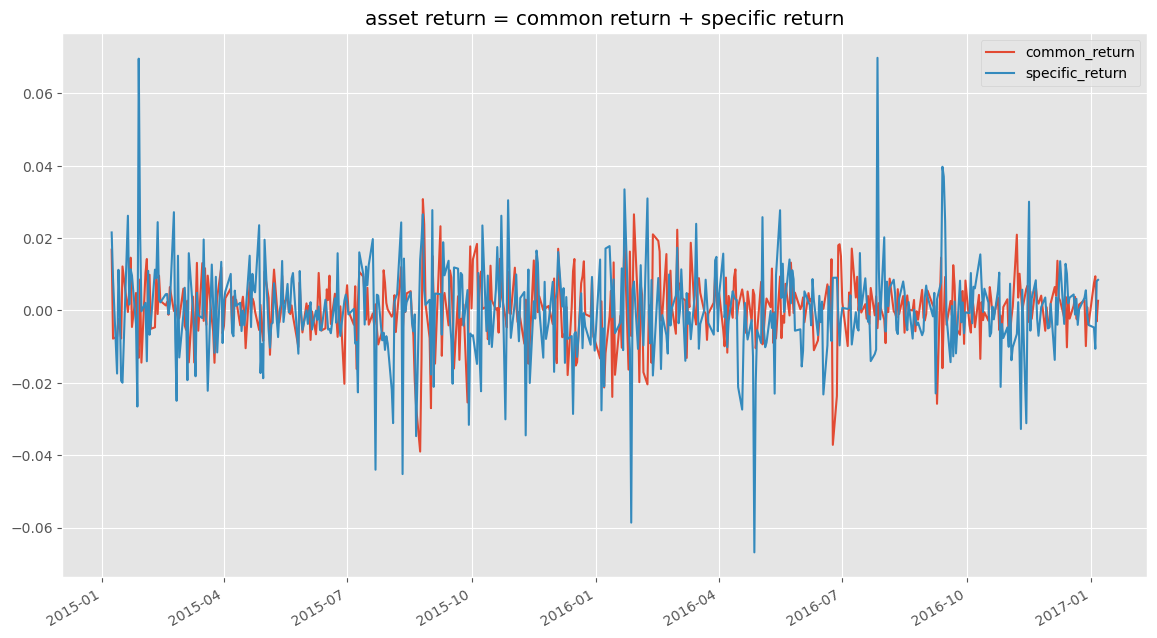

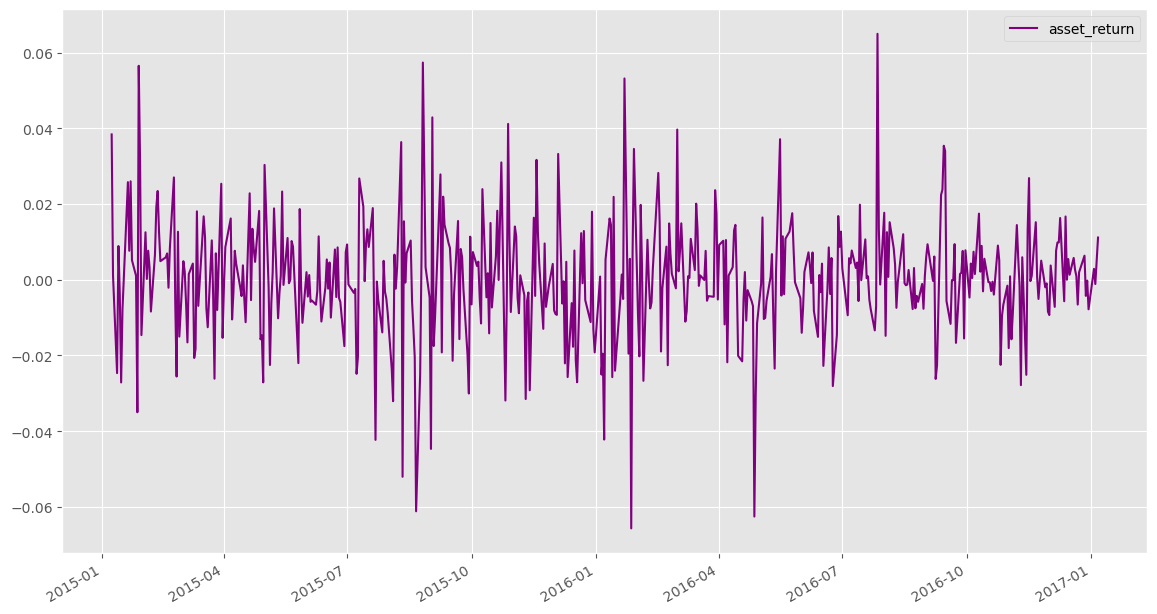

In [86]:
return_components.plot(title="asset return = common return + specific return");
pd.DataFrame(asset_return).plot(color='purple');

## Solution

[Solution notebook](factor_model_asset_return_solution.ipynb)